In [1]:
#Group project!



We've been hired by a new fizzy seltzer brand called Brian's Booze. The company has hired us as Data Scientists to determine which countries have the highest alcohol consumption so that their marketing team can target those countries to build/sell their brand in. It is our job to use different lifestyle variables that will help predict which countries have the highest alcohol consumption per capita. 

According to the National Library of Medicine, the differences in alcohol consumption per capita shed light on the different social, cultural, and political environments of different countries. Countries with high or low per capita alcohol consumption are referred to as wet or dry cultures, respectively. In wet cultures, alcohol is a part of daily life and social activities, examples include European countries in the Mediterranean. On the otherhand, in dry cultures, alcohol is not as prevalent in everyday life, so for example it would not be as freequent in meals. Abstinence is more common, but interestingly enough when drinking occurs, it is more likely to reesult in intoxication in these cultures. The United States, Canada, and Scandinavian countries are examples of drier cultures. So although a country may be deemed a more 'dry' or 'wet' country, it can still be a good target for an alcohol brand looking to break into the industry.

We will cluster alcohol consumption into low, medium, and high categories. 

In [98]:
# Load libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
#let import all out data
#Alcohol Data
alc_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/alcohol.csv")
df_alc = pd.melt(alc_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='Alcohol Consumption')
columns_to_drop = ['Series Name', 'Series Code', 'Country Code']
df_alc = df_alc.drop(columns=columns_to_drop)
df_alc.head()

,Country Name,Year,Alcohol Consumption
0,Afghanistan,2015 [YR2015],0.00874
1,Africa Eastern and Southern,2015 [YR2015],4.75979799686623
2,Africa Western and Central,2015 [YR2015],4.4374260825495
3,Albania,2015 [YR2015],5.03752
4,Algeria,2015 [YR2015],0.5844


In [100]:
#Literacy Rate Data
lit_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/Literacy_rate_data.csv")
df_lit = pd.melt(lit_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='Literacy_rate')
columns_to_drop = ['Series Name', 'Series Code', 'Country Code']
df_lit = df_lit.drop(columns=columns_to_drop)
df_lit.head()

,Country Name,Year,Literacy_rate
0,Afghanistan,2015 [YR2015],..
1,Albania,2015 [YR2015],..
2,Algeria,2015 [YR2015],..
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


## need to load in population data

In [101]:
#Population Data
pop_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/pop_data.csv")
df_pop = pd.melt(pop_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='population_density')
columns_to_drop = ['Series Name', 'Series Code', 'Country Code']
df_pop = df_pop.drop(columns=columns_to_drop)
df_pop.head()

,Country Name,Year,population_density
0,Afghanistan,2013 [YR2013],48.3590282569032
1,Albania,2013 [YR2013],105.660291970803
2,Algeria,2013 [YR2013],15.9549850109584
3,American Samoa,2013 [YR2013],264.975
4,Andorra,2013 [YR2013],151.844680851064


In [102]:
#Birth Rate Data
birth_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/birthratedata.csv")
df_birth = pd.melt(birth_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='birth_rate')
df_birth = df_birth.drop(columns=columns_to_drop)
df_birth.head()

,Country Name,Year,birth_rate
0,Afghanistan,2015 [YR2015],38.803
1,Albania,2015 [YR2015],11.718
2,Algeria,2015 [YR2015],25.405
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [103]:
#Primary Edcuation in Labor Force Data
primary_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/primary_edu_LF.csv")
df_primary = pd.melt(primary_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='primary_rate')
df_primary = df_primary.drop(columns=columns_to_drop)
df_primary.head()

,Country Name,Year,primary_rate
0,Afghanistan,2015 [YR2015],..
1,Albania,2015 [YR2015],49.37
2,Algeria,2015 [YR2015],..
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [104]:
#Intentional Homocide Data
murder_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/intentional_homocide.csv")
df_murder = pd.melt(murder_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='murder_rate')
df_murder = df_murder.drop(columns=columns_to_drop)
df_murder.head()

,Country Name,Year,murder_rate
0,Afghanistan,2015 [YR2015],9.97526212023234
1,Albania,2015 [YR2015],2.22030990322398
2,Algeria,2015 [YR2015],1.38076996361026
3,American Samoa,2015 [YR2015],7.78694907335306
4,Andorra,2015 [YR2015],0


In [105]:
#Unemployment Rate Data
unem_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/unemploymentdata.csv")
df_unem = pd.melt(unem_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='unemployment_rate')
df_unem = df_unem.drop(columns=columns_to_drop)
df_unem.head()

,Country Name,Year,unemployment_rate
0,Afghanistan,2015 [YR2015],..
1,Albania,2015 [YR2015],17.19
2,Algeria,2015 [YR2015],11.21
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [106]:
#GDP Data
gdp_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/gdpdata.csv")
df_gdp = pd.melt(gdp_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='GDP')
df_gdp = df_gdp.drop(columns=columns_to_drop)
df_gdp.head()

,Country Name,Year,GDP
0,Afghanistan,2015 [YR2015],592.476164793256
1,Albania,2015 [YR2015],3952.80358410846
2,Algeria,2015 [YR2015],4197.41997101868
3,American Samoa,2015 [YR2015],13101.5418159165
4,Andorra,2015 [YR2015],38885.5303237179


In [107]:
#Death Rate Data
death_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/deathdata.csv")
df_death = pd.melt(death_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='Death_rate')
df_death = df_death.drop(columns=columns_to_drop)
df_death.head()

,Country Name,Year,Death_rate
0,Afghanistan,2015 [YR2015],7.331
1,Albania,2015 [YR2015],7.947
2,Algeria,2015 [YR2015],4.437
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [108]:
#Labor Force Participation Data
labor_df = pd.read_csv("/Users/juliet/Desktop/DS-3001-main/Final Project/laborparticipation.csv")
df_labor = pd.melt(labor_df, id_vars=['Country Name', 'Country Code', 'Series Name', "Series Code"], var_name='Year', value_name='LF_rate')
df_labor = df_labor.drop(columns=columns_to_drop)
df_labor.head()

,Country Name,Year,LF_rate
0,Afghanistan,2015 [YR2015],..
1,Albania,2015 [YR2015],31.3
2,Algeria,2015 [YR2015],25.19
3,American Samoa,2015 [YR2015],..
4,Andorra,2015 [YR2015],..


In [109]:
#now its time to merge all out dataframes. 
# Merge DataFrames
merged_df = pd.merge(df_lit, df_birth, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_unem, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_gdp, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_death, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_labor, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_alc, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_pop, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_murder, on=['Country Name', 'Year'])
merged_df = pd.merge(merged_df, df_primary, on=['Country Name', 'Year'])
merged_df.head()

,Country Name,Year,Literacy_rate,birth_rate,unemployment_rate,GDP,Death_rate,LF_rate,Alcohol Consumption,population_density,murder_rate,primary_rate
0,Afghanistan,2015 [YR2015],..,38.803,..,592.476164793256,7.331,..,0.00874,51.7509145546816,9.97526212023234,..
1,Albania,2015 [YR2015],..,11.718,17.19,3952.80358410846,7.947,31.3,5.03752,105.135145985401,2.22030990322398,49.37
2,Algeria,2015 [YR2015],..,25.405,11.21,4197.41997101868,4.437,25.19,0.5844,16.6026255583626,1.38076996361026,..
3,American Samoa,2015 [YR2015],..,..,..,13101.5418159165,..,..,..,256.84,7.78694907335306,..
4,Andorra,2015 [YR2015],..,..,..,38885.5303237179,..,..,10.76055,152.651063829787,0,..


## Drop variables that will not be needed or are duplicates

In [110]:
#lets take a look at our data and see what needs cleaning!
merged_df.head()

na_counts = merged_df.isna().sum()
print(na_counts)
# Check for NaN values in each row
rows_with_na = merged_df.isna().any(axis=1)

# Display rows with NaN values
print("Rows with NaN values:")
print(merged_df[rows_with_na])# there seems to be some errors when I merged the data frames that added a bunch of NaN values. Lets delete these extra rows because we will not need them

Country Name           0
Year                   0
Literacy_rate          0
birth_rate             0
unemployment_rate      0
GDP                    0
Death_rate             0
LF_rate                0
Alcohol Consumption    0
population_density     0
murder_rate            0
primary_rate           0
dtype: int64
Rows with NaN values:
Empty DataFrame
Columns: [Country Name, Year, Literacy_rate, birth_rate, unemployment_rate, GDP, Death_rate, LF_rate, Alcohol Consumption, population_density, murder_rate, primary_rate]
Index: []


In [111]:

# Drop rows with NaN values in column Country
df_cleaned = merged_df.dropna(subset=['Country Name'], how='any')

#DataFrame after dropping rows with NaN values in column Country Name
# print(df_cleaned)

na_counts = df_cleaned.isna().sum()
print(na_counts)


Country Name           0
Year                   0
Literacy_rate          0
birth_rate             0
unemployment_rate      0
GDP                    0
Death_rate             0
LF_rate                0
Alcohol Consumption    0
population_density     0
murder_rate            0
primary_rate           0
dtype: int64


In [112]:
#Need to drop .. values so that we can transform values to floats
df_cleaned.replace('..', np.nan, inplace=True)
df_cleaned.info()


#We need to change the columns that are objects to strings and floats
columns_to_convert = ['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate","murder_rate", "primary_rate", "Alcohol Consumption"]
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].astype(float)


columns_to_convert2 = ['Country Name', 'Year']
df_cleaned[columns_to_convert2] = df_cleaned[columns_to_convert2].astype(str)

# Add the line to calculate the growth rate
df_cleaned['growth_rate'] = df_cleaned['birth_rate'] - df_cleaned['Death_rate']

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country Name         432 non-null    object
 1   Year                 432 non-null    object
 2   Literacy_rate        65 non-null     object
 3   birth_rate           427 non-null    object
 4   unemployment_rate    247 non-null    object
 5   GDP                  418 non-null    object
 6   Death_rate           427 non-null    object
 7   LF_rate              228 non-null    object
 8   Alcohol Consumption  372 non-null    object
 9   population_density   430 non-null    object
 10  murder_rate          267 non-null    object
 11  primary_rate         210 non-null    object
dtypes: object(12)
memory usage: 40.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------ 

In [113]:
#For the first time we cluster, lets use 2019 data.
df = pd.DataFrame(df_cleaned)

# Specify the year you want to keep
target_year = '2019 [YR2019]'

# Use boolean indexing to filter the DataFrame
df_filtered = df[df['Year'] == target_year]

# Display the result
print(df_filtered)
df_filtered.info()


              Country Name           Year  Literacy_rate  birth_rate  \
216            Afghanistan  2019 [YR2019]            NaN      36.466   
217                Albania  2019 [YR2019]            NaN      10.343   
218                Algeria  2019 [YR2019]            NaN      23.298   
219         American Samoa  2019 [YR2019]            NaN         NaN   
220                Andorra  2019 [YR2019]            NaN       7.000   
..                     ...            ...            ...         ...   
427  Virgin Islands (U.S.)  2019 [YR2019]            NaN      12.300   
428     West Bank and Gaza  2019 [YR2019]      97.378258      29.466   
429            Yemen, Rep.  2019 [YR2019]            NaN      31.778   
430                 Zambia  2019 [YR2019]            NaN      35.462   
431               Zimbabwe  2019 [YR2019]            NaN      31.518   

     unemployment_rate           GDP  Death_rate  LF_rate  \
216                NaN    500.522981       6.791      NaN   
217          

In [114]:
#Now lets normalize the data!
numeric_columns = df_filtered.select_dtypes("float", "int").columns
print(numeric_columns)
df_filtered[numeric_columns]= MinMaxScaler().fit_transform(df_filtered[numeric_columns])


Index(['Literacy_rate', 'birth_rate', 'unemployment_rate', 'GDP', 'Death_rate',
       'LF_rate', 'Alcohol Consumption', 'murder_rate', 'primary_rate',
       'growth_rate'],
      dtype='object')


/var/folders/dg/_hgxmwbx0vn902dz__0p5_440000gn/T/ipykernel_4719/2499516412.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
#Lets do a final Check on NaN values. 
na_counts = df_filtered.isna().sum()
print(na_counts)
df_filtered.info()
#Why dropping all NaN values shrinks our dataset a lot, it won't harm the integrity of the data. 
#we will drop the NaN values here. 
df_2019 = df_filtered.dropna()
df_2019.info()

Country Name             0
Year                     0
Literacy_rate          190
birth_rate               2
unemployment_rate       90
GDP                      7
Death_rate               2
LF_rate                 95
Alcohol Consumption     30
population_density       1
murder_rate             81
primary_rate           104
growth_rate              2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 216 to 431
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         216 non-null    object 
 1   Year                 216 non-null    object 
 2   Literacy_rate        26 non-null     float64
 3   birth_rate           214 non-null    float64
 4   unemployment_rate    126 non-null    float64
 5   GDP                  209 non-null    float64
 6   Death_rate           214 non-null    float64
 7   LF_rate              121 non-null    float64
 8   Alcohol Consumption  186 non-

In [116]:
#The last step is to creat bins for out terget varibale
#will will determine low, high and medium consumption based off of how each country ranks compared to others. 
# Calculate percentiles
percentiles = [0, 0.33, 0.66, 1.0]
percentile_values = df_2019['Alcohol Consumption'].quantile(percentiles)
print(percentile_values)

labels = ['Low', 'Medium', 'High']

# Create the categorical variable
df_2019["Alcohol Consumption Category"] = pd.cut(df_2019['Alcohol Consumption'], percentile_values, labels=labels)



0.00    0.006090
0.33    0.172333
0.66    0.359979
1.00    0.641630
Name: Alcohol Consumption, dtype: float64


/var/folders/dg/_hgxmwbx0vn902dz__0p5_440000gn/T/ipykernel_4719/3042536659.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Run the clustering algo with your best guess for - this Alex

In [117]:
#Run the clustering algo with your best guess for K
clust_data = df_2019[['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate","primary_rate", "murder_rate", "growth_rate"]]
kmeans_obj = KMeans(n_clusters=3, random_state=1).fit(clust_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## View the results


In [118]:
#View the results
print(kmeans_obj.cluster_centers_)
print(kmeans_obj.labels_) #clusters for vector assignments
print(kmeans_obj.inertia_) #distance from centroids, smaller is better

[[0.84943999 0.28471683 0.27695418 0.04152741 0.40399555 0.41699952
  0.52583467 0.11501914 0.38279711]
 [0.88596915 0.31533572 0.44359277 0.02392108 0.37609415 0.45977792
  0.55505758 0.74417081 0.41919638]
 [0.99386658 0.06590088 0.31708595 0.07912638 0.80471891 0.28044949
  0.17460525 0.02831683 0.05737491]]
[2 1 1 1 2 0 0 0 0 2 1 0 0 0]
1.8004663357630029


## Create a visualization of the results with 2 or 3 variables that you think will best differentiate the clusters

In [119]:
df_2019.head()

,Country Name,Year,Literacy_rate,birth_rate,unemployment_rate,GDP,Death_rate,LF_rate,Alcohol Consumption,population_density,murder_rate,primary_rate,growth_rate,Alcohol Consumption Category
233,Belarus,2019 [YR2019],0.998209,0.085087,0.159591,0.033243,0.813909,0.461096,0.641630,46.4107506220284,0.048838,0.029966,0.071532,High
258,Colombia,2019 [YR2019],0.932458,0.219775,0.400157,0.031228,0.304639,0.491772,0.289336,45.2342550698513,0.540779,0.538733,0.357014,Medium
275,El Salvador,2019 [YR2019],0.845571,0.263170,0.159984,0.020402,0.445241,0.500719,0.193122,303.099276061776,0.801787,0.582439,0.350173,Medium
301,Honduras,2019 [YR2019],0.836607,0.393603,0.214230,0.011560,0.229099,0.626618,0.186502,89.0055322191438,0.863225,0.634651,0.536783,Medium
312,Italy,2019 [YR2019],0.990747,0.027528,0.387186,0.167985,0.662279,0.161687,0.468878,201.980545589195,0.011145,0.251505,0.069297,High


In [120]:
#lets see which  variables best correlate with our target variable
target_variable = "Alcohol Consumption"
#I am going to make a correlation matrix to test which variables are important
columns_of_interest = ['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate","primary_rate","murder_rate", "growth_rate"]

# Select the specified columns and the salary column
selected_data = df_2019[columns_of_interest + [target_variable]]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)#death rate and literacy rate seem to have the highest correlation, unemployment does too


                     Literacy_rate  birth_rate  unemployment_rate       GDP  \
Literacy_rate             1.000000   -0.801912           0.292785  0.453047   
birth_rate               -0.801912    1.000000           0.025572 -0.584457   
unemployment_rate         0.292785    0.025572           1.000000  0.195769   
GDP                       0.453047   -0.584457           0.195769  1.000000   
Death_rate                0.311310   -0.618445           0.002181  0.230546   
LF_rate                  -0.129972    0.293484          -0.448613 -0.357682   
primary_rate             -0.296783    0.550376          -0.117198 -0.270818   
murder_rate              -0.035808    0.382783           0.260200 -0.281716   
growth_rate              -0.691312    0.951875           0.017323 -0.505274   
Alcohol Consumption       0.607993   -0.573147           0.321078  0.425128   

                     Death_rate   LF_rate  primary_rate  murder_rate  \
Literacy_rate          0.311310 -0.129972     -0.296783   

In [121]:
fig = px.scatter(df_2019, x="primary_rate", y="Death_rate", color=kmeans_obj.labels_,
                    title="Primary Education Rate vs. Death Rate")
fig.show(renderer="browser")

## Evaluate the quality of the clustering using total variance explained and silhouette scores

In [122]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores
total_sum_squares = np.sum((clust_data - np.mean(clust_data))**2)
total = np.sum(total_sum_squares)
print(total)

between_SSE = (total-kmeans_obj.inertia_)
print(between_SSE)
Var_explained = between_SSE/total
print(Var_explained)#variance explained looks good!

10.274482087495251
8.474015751732248
0.8247632999473234


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



## Determine the ideal number of clusters using the elbow method and the silhouette coefficient - Hailey

In [123]:
X=df_2019[columns_of_interest]

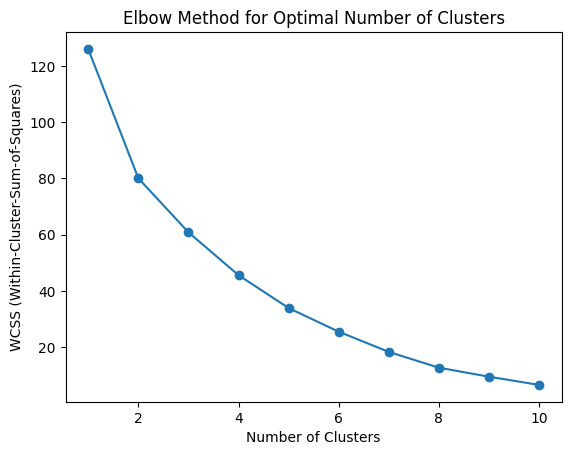

In [124]:
# scale  features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine ideal number of clusters with elbow method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

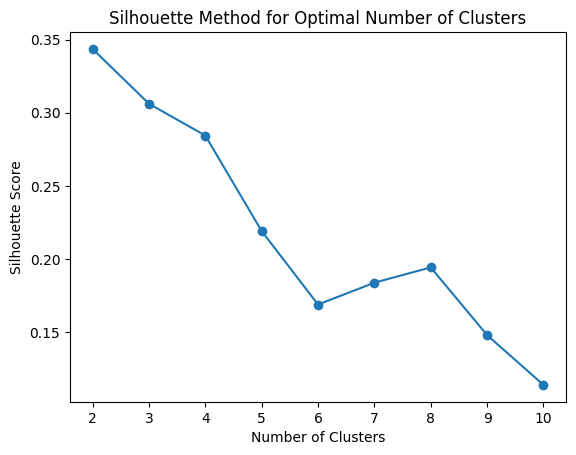

In [125]:
from sklearn.metrics import silhouette_score

# determine the ideal number of clusters using silhouette coefficient
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Visualize the results of the elbow method

In [31]:
# did above

## Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results

In [126]:
#Run the clustering algo with your best guess for K
clust_data1 = df_2019[['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate", "primary_rate", "growth_rate"]]
kmeans_obj1 = KMeans(n_clusters=5, random_state=1).fit(clust_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Once again evaluate the quality of the clustering using total variance explained and silhouette scores

In [127]:
#Further assess the model using total variance explained
#calculate total variance explained
total_sum_squares1 = np.sum((clust_data1 - np.mean(clust_data1))**2)
total1 = np.sum(total_sum_squares1)
print(total1)
between_SSE1 = (total-kmeans_obj1.inertia_)
print(between_SSE1)
Var_explained1 = between_SSE1/total
print(Var_explained1)

8.745169446316023
9.423536203532802
0.9171787077230775


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



## Use the model to select countries for company to consider

In [129]:
numeric_columns = df_cleaned.select_dtypes("float", "int").columns
print(numeric_columns)
df_cleaned[numeric_columns]= MinMaxScaler().fit_transform(df_cleaned[numeric_columns])

Index(['Literacy_rate', 'birth_rate', 'unemployment_rate', 'GDP', 'Death_rate',
       'LF_rate', 'Alcohol Consumption', 'murder_rate', 'primary_rate',
       'growth_rate'],
      dtype='object')


In [130]:
#Lets do a final Check on NaN values. 
na_counts = df_cleaned.isna().sum()
print(na_counts)
df_cleaned.info()
#Why dropping all NaN values shrinks our dataset a lot, it won't harm the integrity of the data. 
#we will drop the NaN values here. 
df_2015_2019 = df_cleaned.dropna()
df_2015_2019.info()

Country Name             0
Year                     0
Literacy_rate          367
birth_rate               5
unemployment_rate      185
GDP                     14
Death_rate               5
LF_rate                204
Alcohol Consumption     60
population_density       2
murder_rate            165
primary_rate           222
growth_rate              5
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         432 non-null    object 
 1   Year                 432 non-null    object 
 2   Literacy_rate        65 non-null     float64
 3   birth_rate           427 non-null    float64
 4   unemployment_rate    247 non-null    float64
 5   GDP                  418 non-null    float64
 6   Death_rate           427 non-null    float64
 7   LF_rate              228 non-null    float64
 8   Alcohol Consumption  372 n

In [131]:
#The last step is to creat bins for out terget varibale
#will will determine low, high and medium consumption based off of how each country ranks compared to others. 
# Calculate percentiles
percentiles = [0, 0.33, 0.66, 1.0]
percentile_values = df_2015_2019['Alcohol Consumption'].quantile(percentiles)
print(percentile_values)

labels = ['Low', 'Medium', 'High']

# Create the categorical variable
df_2015_2019["Alcohol Consumption Category"] = pd.cut(df_2015_2019['Alcohol Consumption'], percentile_values, labels=labels)

0.00    0.006090
0.33    0.212179
0.66    0.394880
1.00    0.641630
Name: Alcohol Consumption, dtype: float64


/var/folders/dg/_hgxmwbx0vn902dz__0p5_440000gn/T/ipykernel_4719/3212414474.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
clust_data = df_2015_2019[['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate","murder_rate", "primary_rate", "growth_rate"]]
kmeans_obj = KMeans(n_clusters=3, random_state=1).fit(clust_data)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [133]:
#View the results
print(kmeans_obj.cluster_centers_)
print(kmeans_obj.labels_) #clusters for vector assignments
print(kmeans_obj.inertia_) #distance from centroids, smaller is better

[[0.89173649 0.28507572 0.1931954  0.03721451 0.37024995 0.47663602
  0.17193944 0.55876994 0.39851687]
 [0.9132554  0.28996139 0.77412951 0.05140096 0.49458957 0.29846621
  0.18515265 0.51283043 0.36262993]
 [0.99416997 0.0647679  0.24638566 0.07912638 0.80471891 0.27333126
  0.01262436 0.17206104 0.05737491]]
[0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0 0 2 0 0 0 0 2 1 0 0 0]
3.3315283323082987


In [134]:
df_2015_2019.head()

,Country Name,Year,Literacy_rate,birth_rate,unemployment_rate,GDP,Death_rate,LF_rate,Alcohol Consumption,population_density,murder_rate,primary_rate,growth_rate,Alcohol Consumption Category
23,Bolivia,2015 [YR2015],0.898038,0.438782,0.091936,0.013851,0.429044,0.437870,0.253673,10.2373165328164,0.045837,0.586202,0.519146,Medium
26,Brazil,2015 [YR2015],0.892535,0.217104,0.257789,0.043011,0.375078,0.606820,0.482413,24.5495056316357,0.265461,0.635332,0.335174,High
32,Cabo Verde,2015 [YR2015],0.821484,0.326652,0.953268,0.014822,0.324213,0.457957,0.342717,137.013895781638,0.077990,0.682785,0.451235,Medium
40,Chile,2015 [YR2015],0.957758,0.179817,0.195174,0.067045,0.353574,0.312364,0.456362,24.03410209648,0.021950,0.434300,0.308260,High
42,Colombia,2015 [YR2015],0.922228,0.238207,0.258705,0.030184,0.287890,0.551853,0.295322,42.4693357368184,0.253968,0.583108,0.382631,Medium


In [135]:
#lets see which  variables best correlate with our target variable
target_variable = "Alcohol Consumption"
#I am going to make a correlation matrix to test which variables are important
columns_of_interest = ['Literacy_rate', 'birth_rate', "unemployment_rate", "GDP", "Death_rate", "LF_rate", "primary_rate","murder_rate", "growth_rate"]

# Select the specified columns and the salary column
selected_data = df_2015_2019[columns_of_interest + [target_variable]]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Print the correlation matrix
print(correlation_matrix)#death rate and literacy rate seem to have the highest correlation, unemployment does too

                     Literacy_rate  birth_rate  unemployment_rate       GDP  \
Literacy_rate             1.000000   -0.651566           0.121145  0.484761   
birth_rate               -0.651566    1.000000          -0.057096 -0.654400   
unemployment_rate         0.121145   -0.057096           1.000000  0.187344   
GDP                       0.484761   -0.654400           0.187344  1.000000   
Death_rate                0.283696   -0.560619           0.100102  0.319008   
LF_rate                  -0.117592    0.293734          -0.410239 -0.356174   
primary_rate             -0.245223    0.486482          -0.081115 -0.301835   
murder_rate              -0.174842    0.308291          -0.029502 -0.323514   
growth_rate              -0.589360    0.951192          -0.079686 -0.604623   
Alcohol Consumption       0.536855   -0.511180           0.359913  0.449347   

                     Death_rate   LF_rate  primary_rate  murder_rate  \
Literacy_rate          0.283696 -0.117592     -0.245223   

In [136]:
fig = px.scatter_3d(df_2015_2019, x="GDP", y="growth_rate", z="Literacy_rate", color=kmeans_obj.labels_,
                    title="GDP vs. Death Rate vs. Literacy_rate")
fig.show(renderer="browser")

In [137]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores
total_sum_squares = np.sum((clust_data - np.mean(clust_data))**2)
total = np.sum(total_sum_squares)
print(total)

between_SSE = (total-kmeans_obj.inertia_)
print(between_SSE)
Var_explained = between_SSE/total
print(Var_explained)#variance explained looks good!

20.720696597357
17.389168265048703
0.8392173585161589


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [138]:
X=df_2015_2019[columns_of_interest]

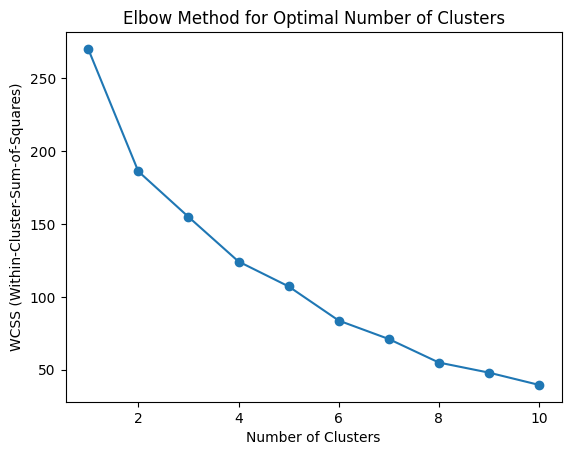

In [139]:
# scale  features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# determine ideal number of clusters with elbow method
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

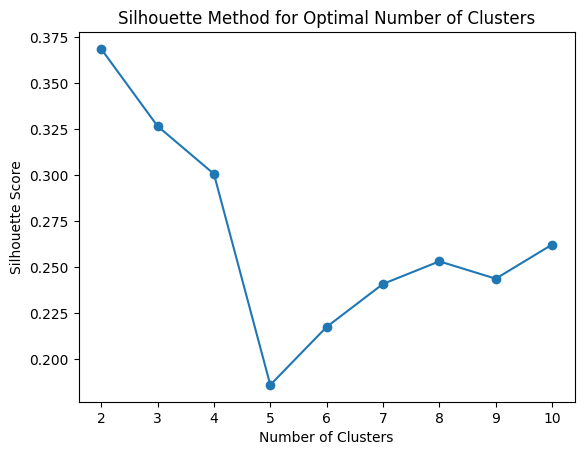

In [140]:
from sklearn.metrics import silhouette_score

# determine the ideal number of clusters using silhouette coefficient
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()